In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the train.csv

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


> Basic Data Exploration Tasks

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [7]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [8]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [9]:
#plt.hist(df['Purchase'])
print(df['Purchase'].max())

23961


## Bivariate DATA EXPLORATION for detecting outliers

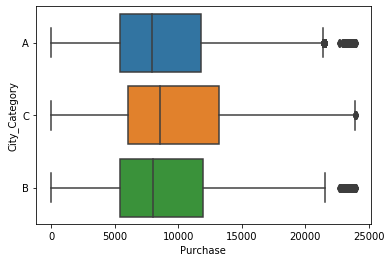

In [13]:
sns.boxplot(x = df['Purchase'],y = df['City_Category'])

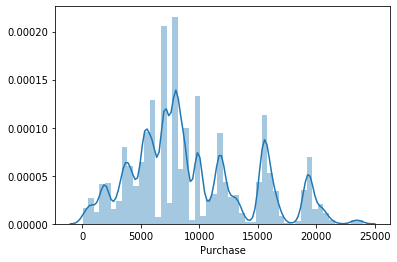

In [14]:
sns.distplot(df['Purchase'])

## Removing OutLIARS

In [10]:
#Removing Outliers
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Purchase'] >= Q1 - 1.5 * IQR) & (df['Purchase'] <= Q3 + 1.5 *IQR)
df_filter = df.loc[filter]  

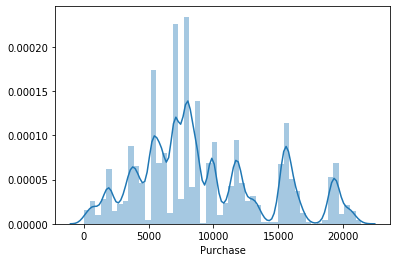

In [11]:
sns.distplot(df_filter['Purchase'])

ALtering dtypes of few features for uniformity

In [12]:
#Changing type of Product_Category from float to int
df_filter.fillna(0,inplace = True )

df_filter["Product_Category_2"] = df_filter["Product_Category_2"].astype(int)

df_filter["Product_Category_3"] = df_filter["Product_Category_3"].astype(int)

df_filter['Stay_In_Current_City_Years'] = df_filter['Stay_In_Current_City_Years'].replace({'4+':4})

df_filter['Stay_In_Current_City_Years'] = df_filter['Stay_In_Current_City_Years'].astype(int)
df_filter['Occupation'] = pd.Categorical(df_filter['Occupation'])
df_filter['Marital_Status'] = pd.Categorical(df_filter['Marital_Status'])
df_filter.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                    category
City_Category                   object
Stay_In_Current_City_Years       int32
Marital_Status                category
Product_Category_1               int64
Product_Category_2               int32
Product_Category_3               int32
Purchase                         int64
dtype: object

Defining our categorical variables and getDummies
>Here Encoding our categorical data with the help of the fucn called getdummies for our statistical analysis

In [14]:
catVars = ['Gender','Age','Occupation','City_Category','Marital_Status']
df_dummy = pd.get_dummies(df_filter[catVars],drop_first = True)

In [15]:
df_dummy

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Marital_Status_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
550064,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
550065,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
550066,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df_target = df_filter['Purchase']
df_red = pd.concat([df_dummy , df_target],axis =1)
print(df_red.columns)

Index(['Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50',
       'Age_51-55', 'Age_55+', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_B', 'City_Category_C',
       'Marital_Status_1', 'Purchase'],
      dtype='object')


>The PointBiserial correlation is used to carry out analysis and check the wheather our Dependent variable(Continous)
have any kind of relationship with our Independent variables(Categorical), with sole purpose being able to reduce the dimensionality of our dependent variables.

In [17]:
from scipy.stats import pointbiserialr

In [18]:
X = df_red[df_red.columns[0:29]]
X
Y = df_red[df_red.columns[-1]]
Y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 547391, dtype: int64

The following function helps us to calculate the point biserial correlation and corresponding P-Value

In [20]:
l = []

for i in range(1,30):
    x = df_red[df_red.columns[i]]
    pbc = pointbiserialr(x, Y)
    #print("for",df_red.columns[i],"pbc is",pbc)
    l.append(list(pbc))
    #print(wor)
#print(l)

corr = pd.DataFrame(l, columns = ['coree', 'p-val']) 
  
corr.head()

,coree,p-val
0,-0.006826,4.417592e-07
1,-0.000356,7.921135e-01
2,0.005928,1.156343e-05
3,-0.004060,2.666375e-03
4,0.012615,1.024238e-20


In [21]:
corr.loc[corr['p-val']>0.05]

,coree,p-val
1,-0.000356,0.792114
5,0.000857,0.526063
11,-0.000178,0.894998
16,-0.002588,0.055515
18,-0.000037,0.978238
23,-0.001831,0.175415
28,-0.001448,0.284077


In [22]:
#len(corr)
l_null = []
for i in range(len(corr)):
    if corr.loc[i,'p-val']>0.05:
        #print('hypo presen')
        l_null.append(i)
#l_null
drop_col = X.columns[l_null]

In [23]:
#X.head()
X.drop(drop_col, axis = 1, inplace = True) 
X

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Gender_M,Age_26-35,Age_36-45,Age_46-50,Age_55+,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_6,...,Occupation_9,Occupation_11,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_18,Occupation_19,Occupation_20,City_Category_B
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
550064,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550065,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
550066,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X.columns

Index(['Gender_M', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_55+',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_11', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_B'],
      dtype='object')

Here we have calculated that X represents a one hot encoded feature space where we have already removed a few columns
based on the Point biserial correlation for having no relationship test with  thresholded P value as 0.05
The feature space is now ready for the model
>While below we have figured out the multicollinearity issue by checking the correlation plot and Chi2 continggency tests
>

In [25]:
X.head()

,Gender_M,Age_26-35,Age_36-45,Age_46-50,Age_55+,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_6,...,Occupation_9,Occupation_11,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_18,Occupation_19,Occupation_20,City_Category_B
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#Now we have removed few columns based on the Point Biserial correlation value and based on hypothesis 
#that the correlation P value being >0.05 

##New
#taking df_filter which is actually a filtered df having all categorical columns into our consideration
#creating a copy of it
#Ordinal encoding them and checking Spearman Correlation
# Chi2 contingency tests

In [26]:
#checking the original df_filter
df_filter.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969


In [28]:
#drop user_ID and Product ID
df_copy = df_filter.copy()
df_copy.drop(['User_ID','Product_ID','Purchase'],axis = 1, inplace = True)
df_copy.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,0,0
1,F,0-17,10,A,2,0,1,6,14
2,F,0-17,10,A,2,0,12,0,0
3,F,0-17,10,A,2,0,12,14,0
4,M,55+,16,C,4,0,8,0,0


In [29]:
from sklearn.preprocessing import OrdinalEncoder
#fit
oe = OrdinalEncoder()
oe.fit(df_copy)

#transform
encoded_df = pd.DataFrame(oe.transform(df_copy))
encoded_df.columns = df_copy.columns
encoded_df



,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,0.0,10.0,0.0,2.0,0.0,2.0,0.0,0.0
1,0.0,0.0,10.0,0.0,2.0,0.0,0.0,5.0,11.0
2,0.0,0.0,10.0,0.0,2.0,0.0,11.0,0.0,0.0
3,0.0,0.0,10.0,0.0,2.0,0.0,11.0,13.0,0.0
4,1.0,6.0,16.0,2.0,4.0,0.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
547386,1.0,5.0,13.0,1.0,1.0,1.0,19.0,0.0,0.0
547387,0.0,2.0,1.0,2.0,3.0,0.0,19.0,0.0,0.0
547388,0.0,2.0,15.0,1.0,4.0,1.0,19.0,0.0,0.0
547389,0.0,6.0,1.0,2.0,2.0,0.0,19.0,0.0,0.0


In [30]:
corrSpear = encoded_df.corr(method ='spearman')
corrSpear

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
Gender,1.000000,-0.005520,0.117154,-0.004398,0.013085,-0.011425,-0.064754,0.007193,0.036552
Age,-0.005520,1.000000,0.092685,0.107655,-0.002030,0.306066,0.061705,0.012002,-0.012232
Occupation,0.117154,0.092685,1.000000,0.038088,0.028529,0.016776,-0.016485,0.008929,0.012783
City_Category,-0.004398,0.107655,0.038088,1.000000,0.020914,0.039524,-0.026007,0.020371,0.038813
Stay_In_Current_City_Years,0.013085,-0.002030,0.028529,0.020914,1.000000,-0.012812,-0.005574,0.001851,0.002607
Marital_Status,-0.011425,0.306066,0.016776,0.039524,-0.012812,1.000000,0.020701,-0.001685,-0.007067
Product_Category_1,-0.064754,0.061705,-0.016485,-0.026007,-0.005574,0.020701,1.000000,-0.125091,-0.464013
Product_Category_2,0.007193,0.012002,0.008929,0.020371,0.001851,-0.001685,-0.125091,1.000000,0.137817
Product_Category_3,0.036552,-0.012232,0.012783,0.038813,0.002607,-0.007067,-0.464013,0.137817,1.000000


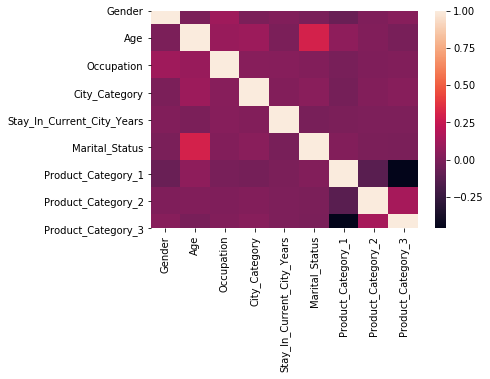

In [43]:
sns.heatmap(corrSpear)

If there were supposedly present any collinearity then we would have removed it using this
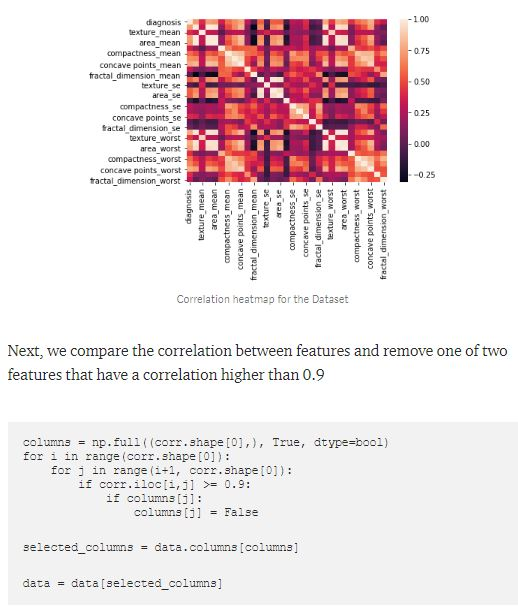# 

>Just here to conclude that ther is not observeable multi collinearty between the inputs

In [44]:
#Chi Square test

In [31]:
from scipy.stats import chi2_contingency
for i in range(0,9):
    for j in range(0,9):
        table = pd.crosstab(encoded_df[encoded_df.columns[i]],encoded_df[encoded_df.columns[j]])
        ch2,p,dof,ecpected = chi2_contingency(table.values)
        #print(encoded_df.columns[i],' ',encoded_df.columns[j], ch2,p)
        if(p>0.05):
            print('Hypo fails for', encoded_df.columns[i],' ',encoded_df.columns[j])
        #else:
            #print('Hypo does not fails for', encoded_df.columns[i],' ',encoded_df.columns[j])

#The above cell represents that there exists no collinearity between the variables

In [ ]:
#Applying our model

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

In [53]:
line_reg = LinearRegression()
pipeline = make_pipeline(line_reg)
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
cv_results = cross_val_score(
                            pipeline, encoded_df , Y, cv = kf, scoring = "r2", n_jobs = -1)

In [55]:
cv_results

array([0.16744081, 0.16623055, 0.16787247, 0.16258583, 0.1660337 ,
       0.16546359, 0.1692509 , 0.17015689, 0.17568528, 0.16477631])

In [70]:
encoded_df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [74]:
new_df = df_filter[encoded_df.columns]
new_df.dtypes

Gender                          object
Age                             object
Occupation                    category
City_Category                   object
Stay_In_Current_City_Years       int32
Marital_Status                category
Product_Category_1               int64
Product_Category_2               int32
Product_Category_3               int32
dtype: object

In [75]:
OHE_df = pd.get_dummies(new_df, drop_first = True, columns=['Gender','Age','Occupation','City_Category',
                                                            'Marital_Status','Product_Category_1','Product_Category_2'])
OHE_df.columns

Index(['Stay_In_Current_City_Years', 'Product_Category_3', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_B', 'City_Category_C',
       'Marital_Status_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9',
       'Product_Category_1_10', 'Product_Category_1_11',
       'Product_Category_1_12', 'Product_Category_1_13',
       'Product_Category_1_14', 'Product_Category_1_15',
       'Product_Category_1_16',

In [76]:
X_train, X_test, y_train, y_test = train_test_split(OHE_df, Y, test_size=0.3, random_state=0)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear = linear_model.predict(X_test)
y_train_predict = linear_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)
#We can see that here PCA does nit helps in improving RMSE

Root mean squared error on Training Set 2989.1073855621967
R2 score on Training Set:  0.6338329072158064
Root mean squared error on Testing Set 2972.142366663914
R2 score on Testing Set:  0.6375626609775225
